In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam

In [8]:
d1 = pd.read_csv('handwritten.csv').astype('float32')
print(d1.head(20))

      0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
12  0.0  0.0  0.0  0.0  0

In [12]:
X = d1.drop('0', axis = 1)
y = d1['0']

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [18]:
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train d1 shape: ", train_x.shape)
print("Test d1 shape: ", test_x.shape)

Train d1 shape:  (297960, 28, 28)
Test d1 shape:  (74490, 28, 28)


In [26]:
word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

<function matplotlib.pyplot.show(*args, **kw)>

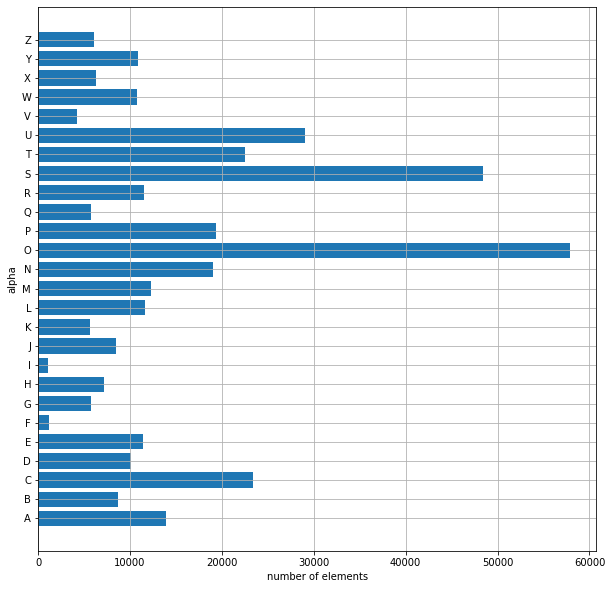

In [40]:
y_int = np.int0(y)
count = np.zeros(26, dtype="int")
for i in y_int:
    count[i] +=1

alpha = []
for i in word.values():
    alpha.append(i)
    
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alpha, count)

plt.xlabel("number of elements")
plt.ylabel("alpha")
plt.grid()
plt.show

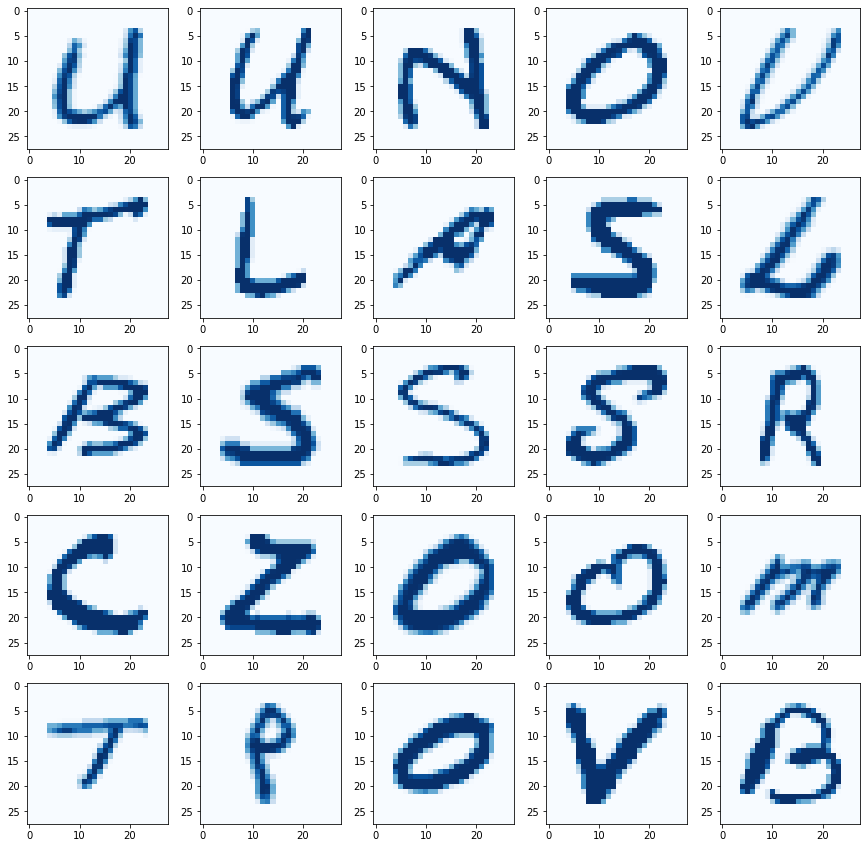

In [50]:
rearr = shuffle(train_x[:100])

fig, ax = plt.subplots(5,5, figsize=(15,15))
axes = ax.flatten()

for i in range(25):
    _, re=cv2.threshold(rearr[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(rearr[i], (28,28)), cmap="Blues")
plt.show()

In [51]:
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2],1)
print("New shape of train d1: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train d1: ", test_X.shape)

New shape of train d1:  (297960, 28, 28, 1)
New shape of train d1:  (74490, 28, 28, 1)


In [52]:
train_1 = to_categorical(train_y, num_classes = 26, dtype='int')
print('New shape of train labels:', train_1.shape)

test_1 = to_categorical(test_y, num_classes = 26, dtype='int')
print('New shape of test labels:', test_1.shape)


New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [61]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ='relu'))
model.add(Dense(128,activation ='relu'))

model.add(Dense(26, activation='softmax'))


In [62]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_1, epochs=2, validation_data = (test_X, test_1))

Train on 297960 samples, validate on 74490 samples
Epoch 1/2
297960/297960 [==============================] - 486s 2ms/step - loss: 0.2694 - accuracy: 0.9267 - val_loss: 0.2109 - val_accuracy: 0.9489
Epoch 2/2
297960/297960 [==============================] - 447s 2ms/step - loss: 0.1649 - accuracy: 0.9601 - val_loss: 0.2493 - val_accuracy: 0.9495


In [66]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9488655924797058, 0.9494831562042236]
The training accuracy is : [0.9266714, 0.96011543]
The validation loss is : [0.2109442535179692, 0.2493419714445059]
The training loss is : [0.2693557328541932, 0.16488650217491035]


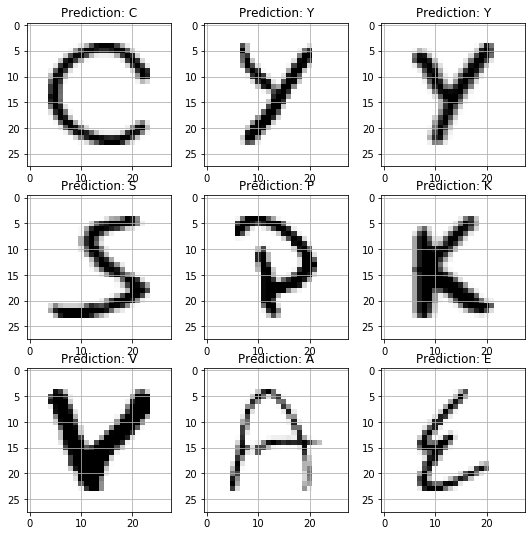

In [72]:
fig, axes = plt.subplots(3,3, figsize=(9,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred=word[np.argmax(test_1[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()